In [2]:
#Install required libraries

!pip install tensorflow-text
!pip install tf-models-official
!pip install nltk
!pip install string-grouper

     |████████████████████████████████| 4.3 MB 8.6 MB/s 
     |████████████████████████████████| 1.6 MB 7.5 MB/s 
     |████████████████████████████████| 99 kB 12.4 MB/s 
     |████████████████████████████████| 43 kB 2.5 MB/s 
     |████████████████████████████████| 352 kB 61.4 MB/s 
     |████████████████████████████████| 636 kB 66.0 MB/s 
     |████████████████████████████████| 54 kB 3.8 MB/s 
     |████████████████████████████████| 1.2 MB 61.2 MB/s 
     |████████████████████████████████| 679 kB 67.4 MB/s 
     |████████████████████████████████| 211 kB 70.7 MB/s 
     |████████████████████████████████| 37.1 MB 47 kB/s 
  Created wheel for py-cpuinfo: filename=py_cpuinfo-8.0.0-py3-none-any.whl size=22257 sha256=de0eb58398a98030686df82004205188cbf6950a579b636c324c7ce3ba3c05ca
  Stored in directory: /root/.cache/pip/wheels/d2/f1/1f/041add21dc9c4220157f1bd2bd6afe1f1a49524c3396b94401
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16181 sha256=8466bf8d5ddcc045d1

In [3]:
import string
import nltk
import re

nltk.download("stopwords")
stopwords = nltk.corpus.stopwords.words('english')

class text_cleaner:
  def remove_emoji(self, text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF" 
        u"\U0001F680-\U0001F6FF" 
        u"\U0001F1E0-\U0001F1FF" 
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)
    
  def remove_punctuation(self, text):
    new_text = ''
    for char in text:
      if char in string.punctuation:
        new_text += ' '
      else:
        new_text += char

    return new_text

  def lowering(self, text):
    return text.lower()

  def remove_stopwords(self, text):
    text = text.split()
    text = ''.join([i + ' ' for i in text if i not in stopwords]).strip()
    return text

  def clean(self, text):
    text = self.remove_punctuation(text)
    text = self.lowering(text)
    text = self.remove_emoji(text)
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
%cd /content/drive/MyDrive
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Bigtech - 20-09-2020 till 13-10-2020 2 (1).csv')[['text','polarity']]
data = data.drop_duplicates()
data = data.dropna().reset_index(drop = True)
data.columns = ['text','sentiment']

/content/drive/MyDrive


In [5]:
data['sentiment'] = data['sentiment'].apply(lambda a:1 if a>0.8 else -1 if a<-0.8 else a)

data = data[(data.sentiment==0) | (data.sentiment==1) | (data.sentiment==-1)]
data = data.reset_index(drop=True)

data['sentiment'].value_counts()

 0.0    98225
 1.0    17646
-1.0     2692
Name: sentiment, dtype: int64

In [6]:
data.head(20)

,text,sentiment
0,"#BullSequana X2415, the first #supercomputer b...",0.0
1,#NVIDIA delays launch of #GeForce RTX 3070 unt...,0.0
2,"#BullSequana X2415, the first #supercomputer b...",0.0
3,"#BullSequana X2415, the first #supercomputer b...",0.0
4,"#BullSequana X2415, the first #supercomputer b...",0.0
5,"#BullSequana X2415, the first #supercomputer b...",0.0
6,📸 #PhotoModeMonday MAN'S ROAD ☁️ 🎵 https://t...,0.0
7,Hardware Utilization of VividSparks Products. ...,0.0
8,Hello everyone! I am excited to announce that ...,1.0
9,"#BullSequana X2415, the first #supercomputer b...",0.0


In [7]:
cleaner = text_cleaner()
data['text'] = data['text'].apply(lambda a:cleaner.clean(a))
data = data.drop_duplicates().reset_index(drop = True)

In [8]:
data.head(20)

,text,sentiment
0,bullsequana x2415 the first supercomputer b...,0.0
1,nvidia delays launch of geforce rtx 3070 unt...,0.0
2,bullsequana x2415 the first supercomputer b...,0.0
3,bullsequana x2415 the first supercomputer b...,0.0
4,bullsequana x2415 the first supercomputer b...,0.0
5,bullsequana x2415 the first supercomputer b...,0.0
6,photomodemonday man s road ☁️ https t c...,0.0
7,hardware utilization of vividsparks products ...,0.0
8,hello everyone i am excited to announce that ...,1.0
9,bullsequana x2415 the first supercomputer b...,0.0


In [9]:
from string_grouper import group_similar_strings

data2 = pd.Series()

for i in range(5):
  data3 = group_similar_strings(data.iloc[20000*i:(i+1)*20000]['text'],ignore_index=True, min_similarity=0.8)
  data2 = data2.append(data3, ignore_index = True)

data3 = group_similar_strings(data.iloc[100000:]['text'],ignore_index=True, min_similarity=0.8)
data2 = data2.append(data3, ignore_index = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
data['text'] = data2
data = data.drop_duplicates(subset = 'text').reset_index(drop=True)

data['sentiment'].value_counts()

 0.0    90831
 1.0    15929
-1.0     2546
Name: sentiment, dtype: int64

In [11]:
data_0 = data[data.sentiment == 0].sample(n = 2546)
data_1 = data[data.sentiment == 1].sample(n = 2546)
data_2 = data[data.sentiment == -1].sample(n = 2546)

data = data_0.append(data_1, ignore_index = True)
data = data.append(data_2, ignore_index = True)

data = data.sample(frac=1).reset_index(drop = True)

In [12]:
import numpy as np

X = data['text'].values
y = data['sentiment'].values

new_y = []
for value in y:
  if value == -1:
    new_y.append([1,0,0])
  elif value== 0:
    new_y.append([0,1,0])
  else:
    new_y.append([0,0,1])

y = np.array(new_y)

In [13]:
import os

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

tf.get_logger().setLevel('ERROR')

In [23]:
bert_preprocess_model = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3')
bert_model = hub.KerasLayer("https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1", trainable = True)

In [24]:
# Model definition

def build_classifier_model():
  # Input layer 
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')

  # Tokenizer layer 
  encoder_inputs = bert_preprocess_model(text_input)

  # Pretrained bert layer
  outputs = bert_model(encoder_inputs)

  # Get pooled output of bert
  net = outputs['pooled_output']
  
  # Dense layer
  net = tf.keras.layers.Dense(128, activation='relu', name='hidden')(net)

  # Dropout layer
  net = tf.keras.layers.Dropout(0.3)(net)

  # Classification layer
  net = tf.keras.layers.Dense(3, activation='softmax', name='classifier')(net)
  return tf.keras.Model(text_input, net)


In [25]:
import random

inds = list(range(len(X)))
random.shuffle(inds)

val_size = 0.2
test_size = 0.15

val_inds = inds[:int(val_size * len(inds))]
test_inds = inds[int(val_size * len(inds)):int(val_size * len(inds)) + int(test_size * len(inds))]

not_train = test_inds + val_inds

set_not_train = set(not_train)
set_inds = set(inds)
set_train = set_inds.difference(set_not_train)

train_inds = list(set_train)

X_train = X[train_inds]
y_train = y[train_inds]

X_val = X[val_inds]
y_val = y[val_inds]

X_test = X[test_inds]
y_test = y[test_inds]

In [26]:
from sklearn.metrics import classification_report
tf.keras.backend.clear_session()

checkpoint_path = "model.ckpt"

results = []
classification_reports = []
train_hists = []
predicts = []
ys = []


cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                save_weights_only=True,
                                                save_best_only=True,
                                                monitor = 'val_loss',
                                                verbose=0)

es_callback = tf.keras.callbacks.EarlyStopping(
  monitor='val_loss', min_delta=0, patience=2, verbose=0,
  mode='min', baseline=None, restore_best_weights=False)

classifier_model = build_classifier_model()
classifier_model.compile(optimizer=tf.keras.optimizers.Adam(lr = 0.0001),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])


train_hist = classifier_model.fit(x = X_train,y=y_train,validation_data=(X_val, y_val),
                              epochs=400,batch_size = 32, callbacks = [cp_callback, es_callback])


predicted = classifier_model.predict(X_test)
predicted = np.array(list(map(lambda a:[0 if i!=np.argmax(a) else 1 for i in range(3)], predicted)))


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/400
156/156 [==============================] - 41s 232ms/step - loss: 0.3378 - accuracy: 0.8671 - val_loss: 0.1759 - val_accuracy: 0.9391
Epoch 2/400
156/156 [==============================] - 36s 229ms/step - loss: 0.1037 - accuracy: 0.9666 - val_loss: 0.1293 - val_accuracy: 0.9627
Epoch 3/400
156/156 [==============================] - 36s 230ms/step - loss: 0.0501 - accuracy: 0.9855 - val_loss: 0.1671 - val_accuracy: 0.9555
Epoch 4/400
156/156 [==============================] - 35s 226ms/step - loss: 0.0262 - accuracy: 0.9917 - val_loss: 0.1942 - val_accuracy: 0.9574


In [27]:
classifier_model.load_weights(checkpoint_path)
hist = classifier_model.evaluate(X_test, y_test)

print(f"\nTest loss: {round(hist[0], 2)}")
print(f"Test acc: {round(hist[1]*100, 2)}%")

36/36 [==============================] - 3s 92ms/step - loss: 0.1244 - accuracy: 0.9590

Test loss: 0.12
Test acc: 95.9%


In [28]:
from sklearn.metrics import confusion_matrix

print("Comfusion matrix:")
print('\n')
predicted = [np.argmax(i) for i in predicted]
y = [np.argmax(i) for i in y_test]
print(confusion_matrix(predicted, y))

Comfusion matrix:


[[364   7  15]
 [  1 350   3]
 [ 11  17 377]]


In [29]:
print(classification_report(y, predicted))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       376
           1       0.99      0.94      0.96       374
           2       0.93      0.95      0.94       395

    accuracy                           0.95      1145
   macro avg       0.95      0.95      0.95      1145
weighted avg       0.95      0.95      0.95      1145



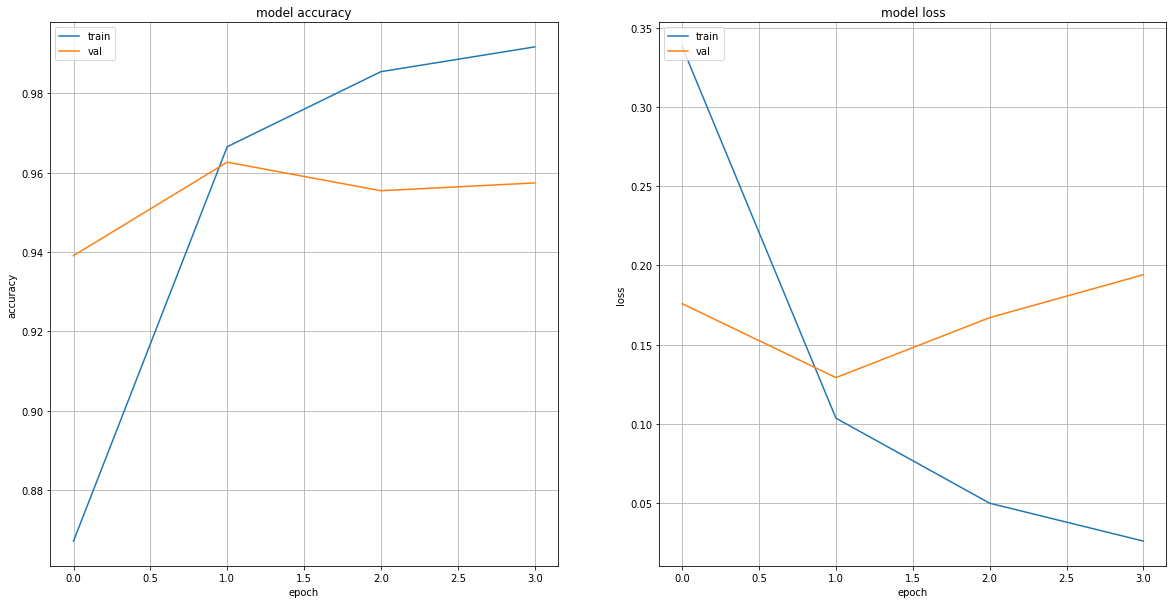

In [30]:
from matplotlib import pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,10))
ax1.plot(train_hist.history['accuracy'])
ax1.plot(train_hist.history['val_accuracy'])
ax1.set_title(f'model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'val'], loc='upper left')
ax1.grid()

ax2.plot(train_hist.history['loss'])
ax2.plot(train_hist.history['val_loss'])
ax2.set_title(f'model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'val'], loc='upper left')
ax2.grid()
fig.show()